In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
### loading dataset and selecting features

data_df = pd.read_csv("maize_yield_data.csv")

data_df.describe(include='all')
data_df.isnull().sum()
data_df.head()
X = data_df[["Area Harvested (ha)", "Fertilizer Use (kg/ha)"]].values
y = data_df['Yield (tonnes/ha)'].values

In [32]:
def compute_loss(X,y,weight,bias):
    prediction = X @ weight + bias
    return np.mean((prediction - y)**2)

In [33]:
def gradient_descent(X_batch,y_batch,weight,bias,learning_rate):
    m = len(y_batch)
    predictions = X_batch @ weight + bias
    error = predictions - y_batch

    gradient_weight = (2/m)* np.sum(X_batch.T @ error)
    gradient_bias = (2/m) * np.sum(error)

    weight -= learning_rate * gradient_weight
    bias -= learning_rate * gradient_bias

    return weight, bias

In [34]:
data_df.head(18)

,Year,Area Harvested (ha),Fertilizer Use (kg/ha),Yield (tonnes/ha)
0,2000,500,10,2.1
1,2001,520,15,2.3
2,2002,550,20,2.5
3,2003,570,25,2.7
4,2004,600,30,2.9
5,2005,620,35,3.1
6,2006,650,40,3.3
7,2007,670,45,3.5
8,2008,700,50,3.7
9,2009,720,55,3.9


In [35]:
def train_model(X,y,learning_rate=0.001, batch_size=9, epochs=500):
    np.random.seed(42)
    weight = np.random.randn(2)*0.001
    bias = np.random.rand()*0.001
    loss_history =[]
    for epoch in range(epochs):
        indices  = np.random.permutation(len(y))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0,len(y),batch_size ):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            weight, bias = gradient_descent(X_batch, y_batch,weight,bias, learning_rate)
        loss = compute_loss(X,y,weight,bias)
        loss_history.append(loss)
    return loss_history



In [36]:
loss_low_lr=train_model(X,y,learning_rate=0.0001, batch_size=9, epochs=500)
loss_medium_lr=train_model(X,y,learning_rate=0.001, batch_size=9, epochs=500)
loss_high_lr=train_model(X,y,learning_rate=0.01, batch_size=9, epochs=500)

C:\Users\Student\AppData\Local\Temp\ipykernel_8832\2492732373.py:3: RuntimeWarning: overflow encountered in square
  return np.mean((prediction - y)**2)
C:\Users\Student\AppData\Local\Temp\ipykernel_8832\2589595166.py:6: RuntimeWarning: overflow encountered in matmul
  gradient_weight = (2/m)* np.sum(X_batch.T @ error)
C:\Users\Student\AppData\Local\Temp\ipykernel_8832\2589595166.py:9: RuntimeWarning: invalid value encountered in subtract
  weight -= learning_rate * gradient_weight
C:\Users\Student\AppData\Local\Temp\ipykernel_8832\2492732373.py:2: RuntimeWarning: overflow encountered in matmul
  prediction = X @ weight + bias
C:\Users\Student\AppData\Local\Temp\ipykernel_8832\2589595166.py:3: RuntimeWarning: overflow encountered in matmul
  predictions = X_batch @ weight + bias
C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs

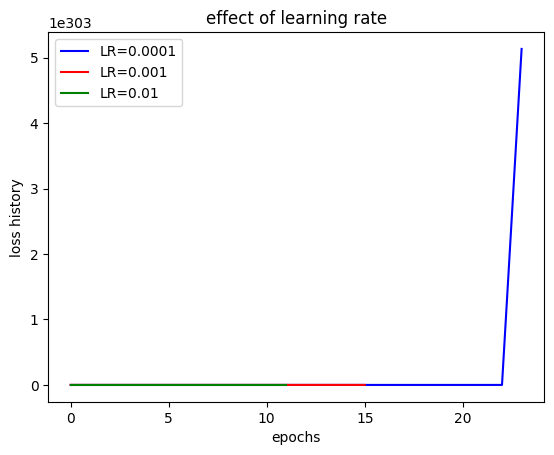

In [37]:
plt.plot(loss_low_lr,label='LR=0.0001',color='blue')
plt.plot(loss_medium_lr,label='LR=0.001',color='red')
plt.plot(loss_high_lr,label='LR=0.01',color='green')
plt.title('effect of learning rate')
plt.xlabel('epochs')
plt.ylabel('loss history')
plt.legend()
plt.show()